# Configuración Inicial

## Habilitar GPU (solo para Google Colab)

En la barra superior:

1.   Entorno de ejecución
2.   Cambiar tipo de entorno de ejecución -> GPU


## Subir *dataset* (solo para Google Colab)

In [1]:
### QUITAR COMENTARIOS Y EJECUTAR PARA USAR EN GOOGLE COLAB ###
#from google.colab import files

#uploaded = files.upload()  # Seleccionar el archivo desde el sistema local

# 1 Procesamiento de datos

## 1.1 Carga y exploración inicial

### 1.1.1 Carga del dataset y visualización inicial

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv("Housing.csv")  # Asegurarse de tener el archivo en el directorio local, o subirlo manualmente a Google Colab

In [3]:
# Visualizar primeras filas
print("Primeras 5 filas:")
print(df.head())

# Verificar valores nulos
print("\nValores faltantes por columna:")
df.isnull().sum()

Primeras 5 filas:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Valores faltantes por columna:


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

No hay valores faltantes en ninguna columna. Por tanto, no es necesario hacer tratamiento de valores nulos.

### 1.1.2 Análisis de distribuciones y outliers

Graficar histogramas y diagramas de caja:

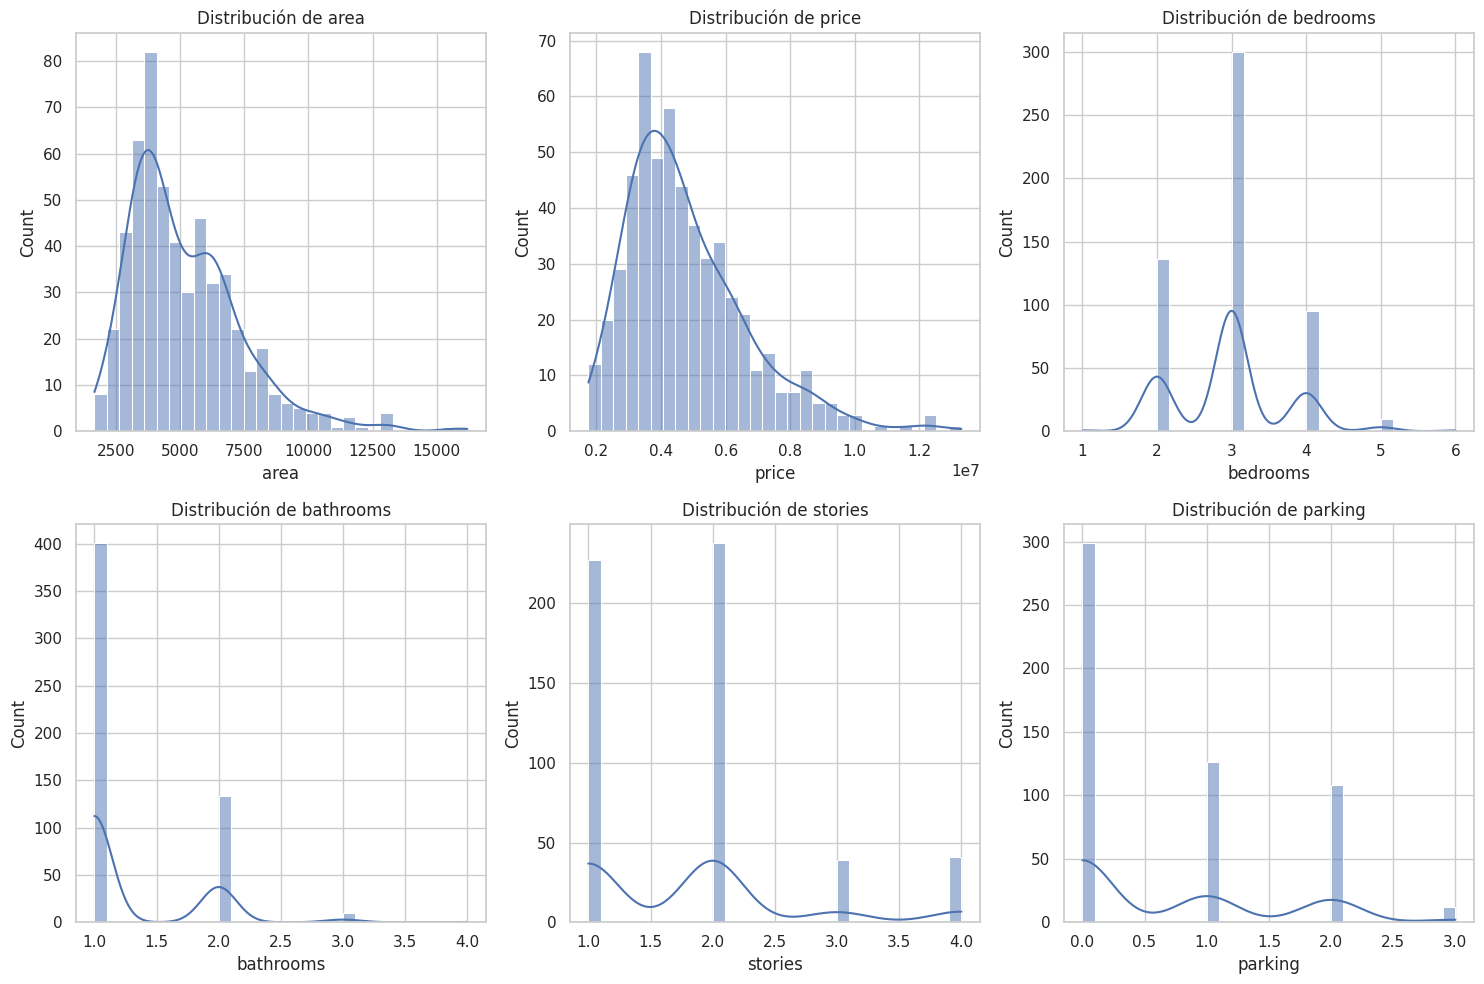

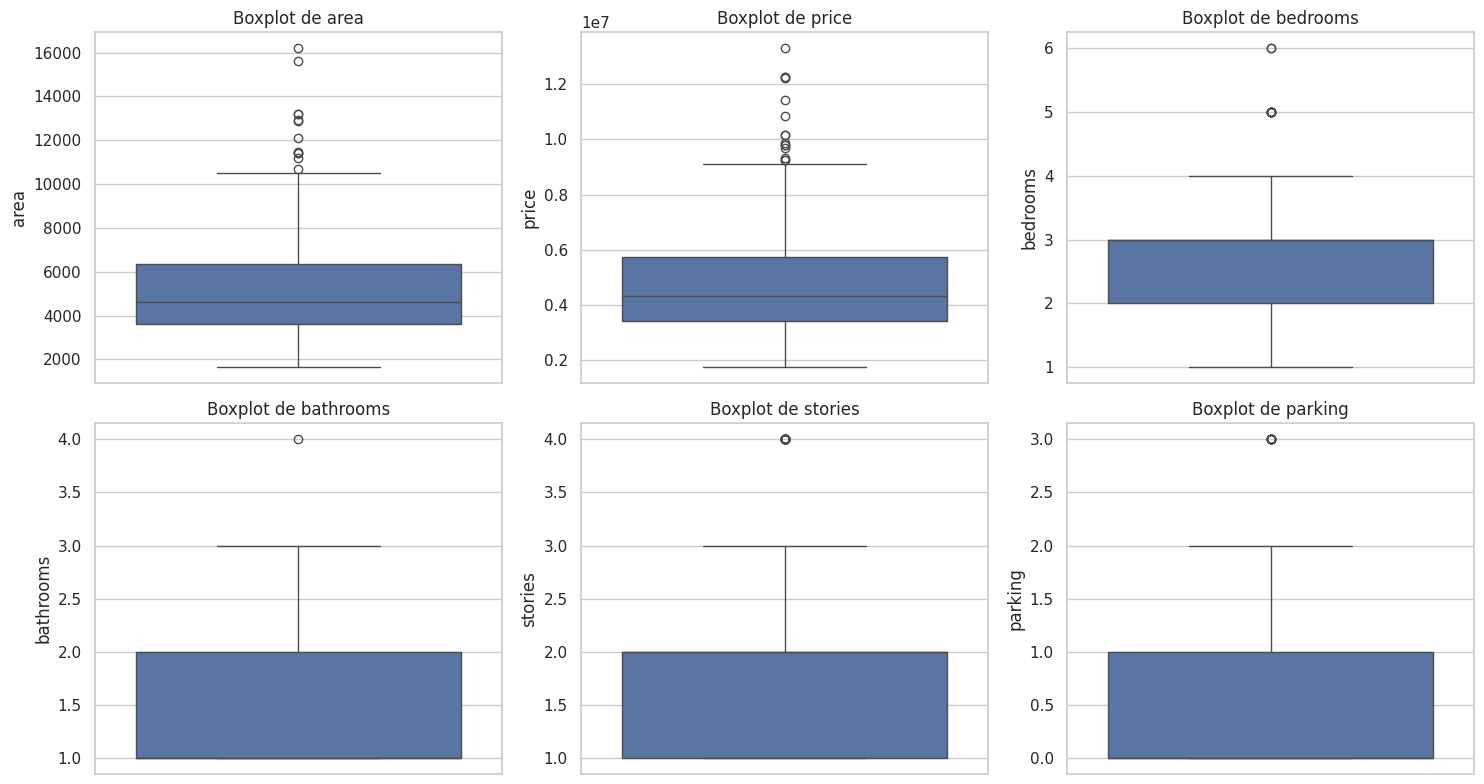

In [4]:
# Configurar estilo de gráficos
sns.set_theme(style="whitegrid")

# Histogramas para variables numéricas
numerical_cols = ['area', 'price', 'bedrooms', 'bathrooms', 'stories', 'parking']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

# Boxplots para detectar outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

- **Histogramas**:

    Muestran la distribución de cada variable numérica.

    Si la distribución tiene una cola larga a la derecha (**sesgo positivo**), significa que hay valores extremadamente altos. En este caso, sucede con `area` y `price`.

- **Boxplots**:

    Identifican valores **atípicos** (_outliers_) en cada variable.

    Los puntos fuera de los "bigotes" (líneas horizontales) son _outliers_. De nuevo, `area` y `price` tienen varios, lo que sugiere que hay propiedades con áreas mucho más grandes que el resto, y con un precio también mucho mayor a los demás.

## 1.2 Preprocesamiento de datos

### 1.2.1 Codificación de variables categóricas

- **Binarias**: `1` para "_yes_", `0` para "_no_".

- ¿Por qué es mejor One-Hot Encoding que Label Encoding en este caso?

    1. Evita jerarquías artificiales:

        La red neuronal podría interpretar erróneamente que unfurnished (0) < semi-furnished (1) < furnished (2), lo que no necesariamente refleja la realidad en los precios.

    2. Flexibilidad del modelo:

        Con One-Hot, cada categoría se trata como una característica independiente, permitiendo al modelo aprender contribuciones no lineales.

    3. Ejemplo práctico:

        Una propiedad semi-furnished no es el "punto medio" entre unfurnished y furnished en términos de precio. One-Hot captura mejor esta relación.

In [5]:
# Variables binarias (yes/no)
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})

# One-Hot Encoding para furnishingstatus
df = pd.get_dummies(df, columns=['furnishingstatus'], prefix='furnishing', dtype=int)

/tmp/ipykernel_2106191/56217782.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})


In [6]:
# Verificar cambios
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_furnished,furnishing_semi-furnished,furnishing_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,0,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,0,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,0,1


### 1.2.2 Normalización de Variables Numéricas

`StandardScaler` centra las variables en 0 con **desviación estándar** 1. De esta forma, evita que variables como `area` (valores grandes) dominen el modelo.

In [7]:
from sklearn.preprocessing import StandardScaler

# Separar variables numéricas
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
X_numerical = df[numerical_cols]

# Escalado (usando StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Reemplazar columnas originales con valores escalados
df[numerical_cols] = X_scaled

In [8]:
# Verificar cambios
df[numerical_cols].head()

,area,bedrooms,bathrooms,stories,parking,price
0,1.046726,1.403419,1.421812,1.378217,1.517692,4.566365
1,1.757010,1.403419,5.405809,2.532024,2.679409,4.004484
2,2.218232,0.047278,1.421812,0.224410,1.517692,4.004484
3,1.083624,1.403419,1.421812,0.224410,2.679409,3.985755
4,1.046726,1.403419,-0.570187,0.224410,1.517692,3.554979


## 1.3 Creación de datos sintéticos (Data Augmentation)

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

# Separar características (X) y variable objetivo (y)
X = df.drop('price', axis=1)  # Todas las columnas excepto 'price'
y = df['price']  # Columna 'price' como variable objetivo

def augment_data(X, y, num_samples=250):
    np.random.seed(42)
    
    # Interpolación entre puntos reales
    idx1 = np.random.randint(0, len(X), num_samples)
    idx2 = np.random.randint(0, len(X), num_samples)
    
    alpha = np.random.uniform(0, 1, num_samples).reshape(-1, 1)
    X_aug = alpha * X.iloc[idx1].values + (1 - alpha) * X.iloc[idx2].values
    y_aug = alpha.flatten() * y.iloc[idx1].values + (1 - alpha.flatten()) * y.iloc[idx2].values
    
    # Agregar ruido gaussiano
    noise_X = np.random.normal(0, 0.01, X_aug.shape)
    noise_y = np.random.normal(0, 0.01, y_aug.shape)
    
    X_aug += noise_X
    y_aug += noise_y
    
    X_aug = pd.DataFrame(X_aug, columns=X.columns)
    y_aug = pd.Series(y_aug, name=y.name)
    
    return X_aug, y_aug

# Aplicar aumentación
X_aug, y_aug = augment_data(X, y, num_samples=500)
X = pd.concat([X, X_aug], axis=0)
y = pd.concat([y, y_aug], axis=0)

## 1.4 Análisis de correlación

### 1.4.1 Matriz de correlación

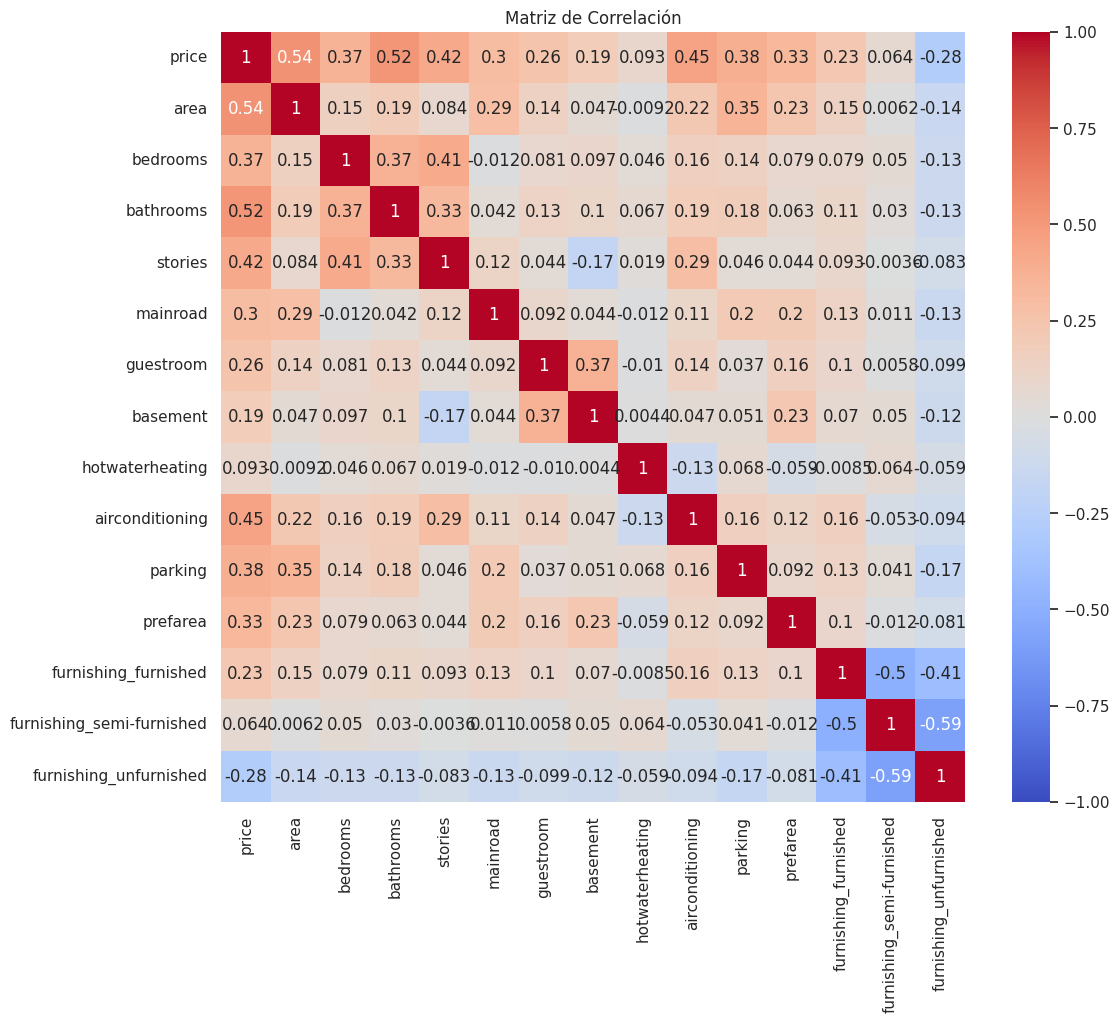

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular matriz de correlación
corr_matrix = df.corr()

# Matriz de correlación para todas las variables
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()

También se puede evaluar sólo la columna de la **matriz de correlación** en función de `price`:

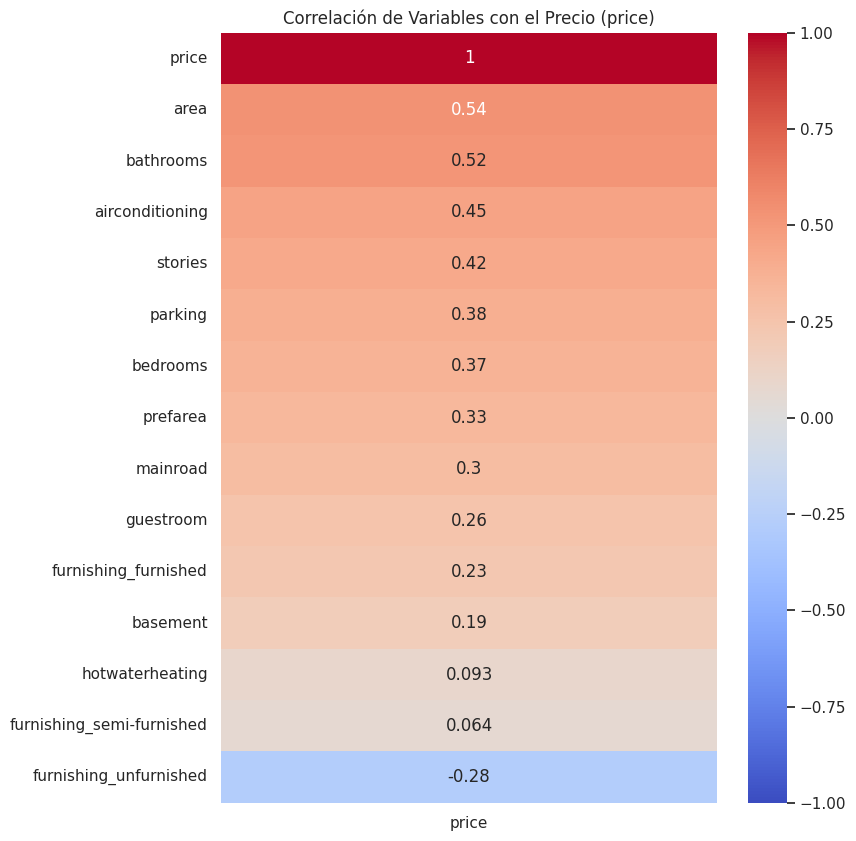

In [11]:
# Filtrar solo las correlaciones con 'price'
price_corr = corr_matrix[['price']].sort_values(by='price', ascending=False)

# Gráfico de correlaciones con 'price'
plt.figure(figsize=(8, 10))
sns.heatmap(price_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlación de Variables con el Precio (price)")
plt.show()

Variables Fuertemente Correlacionadas con `price`:

- Alta correlación **positiva** (`> 0.4`): `area`, `bathrooms`, `airconditioning`: A mayor área, número de baños y/o con aire acondicionado, mayor precio.

- Correlación **negativa** (`< -0.3`): `furnishing_unfurnished`: Las propiedades no amuebladas tienden a ser más baratas.

- **Poca** o casi ninguna correlación:

    - `hotwaterheating` (`0.093`): Saber si una casa tiene o no agua caliente, aporta muy poca información sobre el precio de la misma.

    - `furnishing_semi-furnished` (`0.064`): Que una casa esté "semiamueblada" tiene un impacto mínimo en el precio.

### 1.4.2 Eliminación de variables

Con la información que se ha obtenido al realizar el análisis anterior, se pueden sacar las siguientes **conclusiones**:

- `hotwaterheating`: Se puede **eliminar** esta columna, ya que su correlación con `price` es muy baja, y no aporta información significativa al modelo.

- `furnishing_semi-furnished`: **No** se va a eliminar esta columna, ya que podría carecer de lógica que una vivienda tuviera valor 0 en las otras dos categorías de `furnishing`.

In [12]:
# Eliminar la columna hotwaterheating
df.drop('hotwaterheating', axis=1, inplace=True)

# Verificar el dataset actualizado
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'airconditioning', 'parking', 'prefarea',
       'furnishing_furnished', 'furnishing_semi-furnished',
       'furnishing_unfurnished'],
      dtype='object')

## 1.5 División Train-Test

Se utiliza `train_test_split` para dividir el conjunto de datos en 80% datos de entrenamiento y 20% datos de prueba.

In [13]:
# División: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Verificar tamaños de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (836, 14)
Tamaño del conjunto de prueba: (209, 14)


In [15]:
X_train.head(), y_train.head()

(         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
 388 -0.692084  0.047278  -0.570187  0.224410       1.0        0.0       0.0   
 256 -0.530656  0.047278  -0.570187  0.224410       1.0        0.0       0.0   
 351 -0.715145 -1.308863  -0.570187 -0.929397       1.0        0.0       0.0   
 60   0.391790  0.047278   1.421812  0.224410       1.0        1.0       0.0   
 344 -0.599839 -1.308863  -0.570187 -0.929397       1.0        0.0       0.0   
 
      hotwaterheating  airconditioning   parking  prefarea  \
 388              0.0              0.0 -0.805741       0.0   
 256              0.0              0.0  1.517692       0.0   
 351              0.0              0.0 -0.805741       0.0   
 60               0.0              0.0  0.355976       0.0   
 344              0.0              0.0 -0.805741       0.0   
 
      furnishing_furnished  furnishing_semi-furnished  furnishing_unfurnished  
 388                   0.0                        0.0           

# 2 Model Planning

Asegurarse de que `TensorFlow` esté usando la GPU:

In [16]:
import tensorflow as tf

print("GPUs disponibles:", tf.config.list_physical_devices('GPU'))

2025-03-25 13:10:04.535602: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-25 13:10:07.118903: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742904607.707341 2106191 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742904607.858422 2106191 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742904609.137648 2106191 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

GPUs disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 2.1 Definición de la arquitectura del modelo

Verificación de la arquitectura:

In [17]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Arquitectura del modelo con optimizador como argumento
def create_model(optimizer):
    model = Sequential([
        Input(shape=(X.shape[1],)),                          # Capa de entrada (13 features)
        Dense(64, activation='relu'),                        # Primera capa oculta
        Dropout(0.2),                                        # Regularización por Dropout
        BatchNormalization(),                                # Ayuda con la estabilidad
        Dense(32, activation='relu'),                        # Segunda capa oculta
        Dense(1, activation='linear')                        # Capa de salida con activación lineal
    ])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

In [18]:
# Configuración de K-Fold
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Diccionarios para almacenar métricas
metrics_adam = {'mae': [], 'rmse': [], 'r2': []}
metrics_sgd  = {'mae': [], 'rmse': [], 'r2': []}

# Iterar sobre cada partición del K-Fold
for train_index, val_index in kf.split(X_train):
    X_train_fold = X_train.iloc[train_index]
    y_train_fold = y_train.iloc[train_index]
    X_val_fold = X_train.iloc[val_index]
    y_val_fold = y_train.iloc[val_index]

    # --- Modelo con Adam y Gradient Clipping ---
    model_adam = create_model(Adam(learning_rate=0.001, clipvalue=0.5))
    model_adam.fit(
        X_train_fold, 
        y_train_fold, 
        validation_data=(X_val_fold, y_val_fold),
        epochs=100, 
        batch_size=32, 
        verbose=0
    )
    y_pred_adam = model_adam.predict(X_val_fold).flatten()

    # Cálculo de métricas para Adam
    metrics_adam['mae'].append(mean_absolute_error(y_val_fold, y_pred_adam))
    metrics_adam['rmse'].append(np.sqrt(mean_squared_error(y_val_fold, y_pred_adam)))
    metrics_adam['r2'].append(r2_score(y_val_fold, y_pred_adam))

    # --- Modelo con SGD y Gradient Clipping ---
    model_sgd = create_model(SGD(learning_rate=0.01, momentum=0.9, clipvalue=0.5))
    model_sgd.fit(
        X_train_fold,
        y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=100,
        batch_size=32,
        verbose=0
    )
    y_pred_sgd = model_sgd.predict(X_val_fold).flatten()

    # Cálculo de métricas para SGD
    metrics_sgd['mae'].append(mean_absolute_error(y_val_fold, y_pred_sgd))
    metrics_sgd['rmse'].append(np.sqrt(mean_squared_error(y_val_fold, y_pred_sgd)))
    metrics_sgd['r2'].append(r2_score(y_val_fold, y_pred_sgd))

# Resultados promedio
print("Resultados Adam (Cross-Validation):")
print(f"MAE: {np.mean(metrics_adam['mae']):.4f} ± {np.std(metrics_adam['mae']):.4f}")
print(f"RMSE: {np.mean(metrics_adam['rmse']):.4f} ± {np.std(metrics_adam['rmse']):.4f}")
print(f"R²: {np.mean(metrics_adam['r2']):.4f} ± {np.std(metrics_adam['r2']):.4f}")

print("\nResultados SGD (Cross-Validation):")
print(f"MAE: {np.mean(metrics_sgd['mae']):.4f} ± {np.std(metrics_sgd['mae']):.4f}")
print(f"RMSE: {np.mean(metrics_sgd['rmse']):.4f} ± {np.std(metrics_sgd['rmse']):.4f}")
print(f"R²: {np.mean(metrics_sgd['r2']):.4f} ± {np.std(metrics_sgd['r2']):.4f}")

# Evaluación final en test set (opcional)
final_model = create_model(Adam(learning_rate=0.0001, clipvalue=1.0))
final_model.fit(X_train, y_train, epochs=350, batch_size=32, verbose=0)
y_test_pred = final_model.predict(X_test).flatten()

print("\nEvaluación final en Test Set:")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")
print(f"R²: {r2_score(y_test, y_test_pred):.4f}")

I0000 00:00:1742904637.471345 2106191 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3620 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 6GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1742904639.986831 2106421 service.cc:152] XLA service 0x7f420000aea0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742904639.986859 2106421 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2025-03-25 13:10:40.117336: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742904640.400923 2106421 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1742904641.217860 2106421 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Resultados Adam (Cross-Validation):
MAE: 0.3232 ± 0.0085
RMSE: 0.4518 ± 0.0134
R²: 0.7567 ± 0.0451

Resultados SGD (Cross-Validation):
MAE: 0.3357 ± 0.0154
RMSE: 0.4841 ± 0.0384
R²: 0.7227 ± 0.0436
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

Evaluación final en Test Set:
MAE: 0.3791
RMSE: 0.5142
R²: 0.7144


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeNormal

# Función para crear el modelo con opciones de regularización y Dropout
def create_model(optimizer, dropout_rate=0.0, l2_reg=0.0, n_units=64):
    model = Sequential([
        Dense(n_units, activation='relu', input_shape=(X_train.shape[1],),
              kernel_initializer=HeNormal(), kernel_regularizer=l2(l2_reg)),  # He normal initialization
        BatchNormalization(),
        Dropout(dropout_rate),  # Dropout para evitar sobreajuste
        Dense(n_units, activation='relu', kernel_initializer=HeNormal(), kernel_regularizer=l2(l2_reg)),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(n_units // 2, activation='relu', kernel_initializer=HeNormal(), kernel_regularizer=l2(l2_reg)),
        Dense(1, activation='linear')  # Capa de salida
    ])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

In [20]:
# Dividir datos en entrenamiento y validación (80%-20%)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Crear el modelo con el optimizador Adam
model_adam = create_model(optimizer=Adam(learning_rate=0.001), dropout_rate=0.3, l2_reg=0.01)

# Entrenar el modelo
history = model_adam.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=350,
    batch_size=32,
    verbose=1
)

Epoch 1/350


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 5.2261 - mae: 1.0999 - val_loss: 3.7637 - val_mae: 0.5491
Epoch 2/350
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2377 - mae: 0.8011 - val_loss: 3.6303 - val_mae: 0.5099
Epoch 3/350
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0039 - mae: 0.7425 - val_loss: 3.5101 - val_mae: 0.4789
Epoch 4/350
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8211 - mae: 0.6924 - val_loss: 3.4070 - val_mae: 0.4572
Epoch 5/350
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6637 - mae: 0.6594 - val_loss: 3.3172 - val_mae: 0.4474
Epoch 6/350
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4709 - mae: 0.5851 - val_loss: 3.2343 - val_mae: 0.4345
Epoch 7/350
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3444 - mae: 0.5519 - val_loss: 3.1528 - val_mae: 0.4226
Epoch 8/350
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2650 - mae: 0.5330 - val_loss: 3.0852 - val_mae: 0.4174
Epoch 9/350
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2342 - mae: 0.

In [21]:
# Experimentación con diferentes hiperparámetros
def experiment_with_hyperparameters():
    results = {}
    for lr in [0.001, 0.0001]:
        for batch_size in [16, 32, 64]:
            for dropout in [0.0, 0.3]:
                for l2_reg in [0.0, 0.01]:
                    print(f"Entrenando con lr={lr}, batch_size={batch_size}, dropout={dropout}, l2_reg={l2_reg}")
                    model = create_model(optimizer=Adam(learning_rate=lr), dropout_rate=dropout, l2_reg=l2_reg)
                    history = model.fit(
                        X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=100,
                        batch_size=batch_size,
                        verbose=0
                    )
                    val_loss = history.history['val_loss'][-1]
                    results[(lr, batch_size, dropout, l2_reg)] = val_loss
    return results

# Ejecutar experimentos
hyperparameter_results = experiment_with_hyperparameters()

Entrenando con lr=0.001, batch_size=16, dropout=0.0, l2_reg=0.0


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando con lr=0.001, batch_size=16, dropout=0.0, l2_reg=0.01


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando con lr=0.001, batch_size=16, dropout=0.3, l2_reg=0.0


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando con lr=0.001, batch_size=16, dropout=0.3, l2_reg=0.01


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando con lr=0.001, batch_size=32, dropout=0.0, l2_reg=0.0


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando con lr=0.001, batch_size=32, dropout=0.0, l2_reg=0.01


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando con lr=0.001, batch_size=32, dropout=0.3, l2_reg=0.0


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando con lr=0.001, batch_size=32, dropout=0.3, l2_reg=0.01


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando con lr=0.001, batch_size=64, dropout=0.0, l2_reg=0.0


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando con lr=0.001, batch_size=64, dropout=0.0, l2_reg=0.01


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando con lr=0.001, batch_size=64, dropout=0.3, l2_reg=0.0


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando con lr=0.001, batch_size=64, dropout=0.3, l2_reg=0.01


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando con lr=0.0001, batch_size=16, dropout=0.0, l2_reg=0.0


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando con lr=0.0001, batch_size=16, dropout=0.0, l2_reg=0.01


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando con lr=0.0001, batch_size=16, dropout=0.3, l2_reg=0.0


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando con lr=0.0001, batch_size=16, dropout=0.3, l2_reg=0.01


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando con lr=0.0001, batch_size=32, dropout=0.0, l2_reg=0.0


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando con lr=0.0001, batch_size=32, dropout=0.0, l2_reg=0.01


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando con lr=0.0001, batch_size=32, dropout=0.3, l2_reg=0.0


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando con lr=0.0001, batch_size=32, dropout=0.3, l2_reg=0.01


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando con lr=0.0001, batch_size=64, dropout=0.0, l2_reg=0.0


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando con lr=0.0001, batch_size=64, dropout=0.0, l2_reg=0.01


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando con lr=0.0001, batch_size=64, dropout=0.3, l2_reg=0.0


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando con lr=0.0001, batch_size=64, dropout=0.3, l2_reg=0.01


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Ordenar resultados del experimento por menor pérdida de validación (val_loss)
sorted_results = sorted(hyperparameter_results.items(), key=lambda x: x[1])

# Mostrar las 5 mejores combinaciones
print("Top 5 mejores combinaciones de hiperparámetros:")
for params, val_loss in sorted_results[:5]:
    print(f"LR: {params[0]}, Batch Size: {params[1]}, Dropout: {params[2]}, L2: {params[3]} --> Val Loss: {val_loss:.4f}")

Top 5 mejores combinaciones de hiperparámetros:
LR: 0.001, Batch Size: 16, Dropout: 0.0, L2: 0.0 --> Val Loss: 0.2046
LR: 0.001, Batch Size: 16, Dropout: 0.3, L2: 0.0 --> Val Loss: 0.2068
LR: 0.001, Batch Size: 64, Dropout: 0.3, L2: 0.0 --> Val Loss: 0.2271
LR: 0.001, Batch Size: 32, Dropout: 0.3, L2: 0.0 --> Val Loss: 0.2284
LR: 0.001, Batch Size: 64, Dropout: 0.0, L2: 0.0 --> Val Loss: 0.2706


In [23]:
# Obtener la mejor combinación de hiperparámetros
best_hyperparams = sorted_results[0][0]  # La combinación con menor val_loss

# Crear y entrenar el modelo con la mejor combinación
best_model = create_model(optimizer=Adam(learning_rate=best_hyperparams[0]), 
                          dropout_rate=best_hyperparams[2], 
                          l2_reg=best_hyperparams[3])

history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=350,
    batch_size=best_hyperparams[1],
    verbose=1
)

# Mostrar métricas finales en entrenamiento y validación
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"\nMejor combinación de hiperparámetros:")
print(f"LR: {best_hyperparams[0]}, Batch Size: {best_hyperparams[1]}, Dropout: {best_hyperparams[2]}, L2: {best_hyperparams[3]}")
print(f"Train Loss: {final_train_loss:.4f}, Val Loss: {final_val_loss:.4f}")

Epoch 1/350


/mnt/c/Users/aleja/Desktop/Master/05 - IA Generativa/Desarrollo/CasoEstudio-Housing/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 1.5554 - mae: 0.9439 - val_loss: 0.7294 - val_mae: 0.6927
Epoch 2/350
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5796 - mae: 0.5850 - val_loss: 0.4517 - val_mae: 0.5080
Epoch 3/350
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4796 - mae: 0.5447 - val_loss: 0.3676 - val_mae: 0.4503
Epoch 4/350
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3706 - mae: 0.4723 - val_loss: 0.3687 - val_mae: 0.4444
Epoch 5/350
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3693 - mae: 0.4690 - val_loss: 0.3351 - val_mae: 0.4248
Epoch 6/350
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3730 - mae: 0.4584 - val_loss: 0.2909 - val_mae: 0.3961
Epoch 7/350
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3293 - mae: 0.4461 - val_loss: 0.3038 - val_mae: 0.4170
Epoch 8/350
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2857 - mae: 0.4140 - val_loss: 0.2993 - val_mae: 0.4023
Epoch 9/350
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2992 - mae: 0.

In [24]:
# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"RMSE: {rmse:.4f}")

# RMSE como porcentaje del rango de los valores reales
rmse_range_percentage = (rmse / (np.max(y_test) - np.min(y_test))) * 100

print(f"RMSE (% sobre rango): {rmse_range_percentage:.2f}%")

RMSE: 0.5142
RMSE (% sobre rango): 9.15%


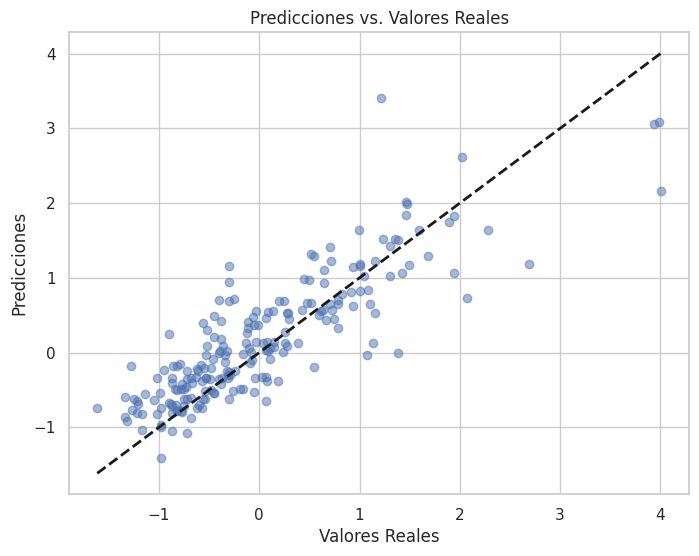

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'k--', lw=2)
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

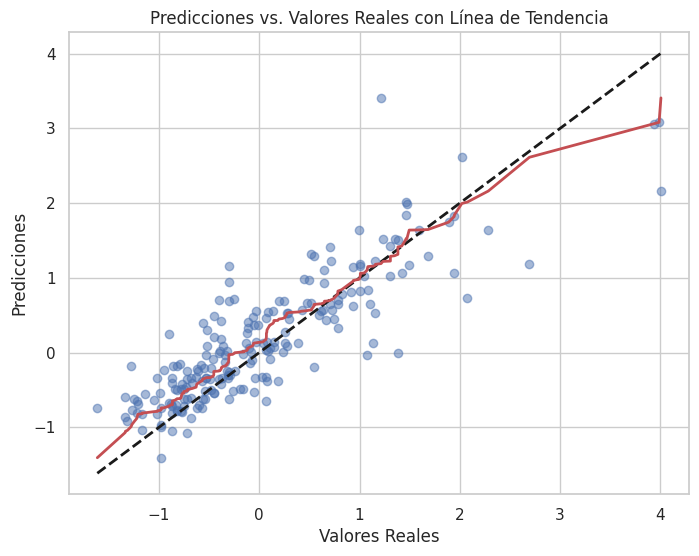

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'k--', lw=2)
plt.plot(np.sort(y_test), np.sort(y_test_pred), 'r-', lw=2)  # Línea de tendencia
plt.title('Predicciones vs. Valores Reales con Línea de Tendencia')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

In [32]:
errors = np.abs(y_test - y_test_pred)
significant_errors = errors > 0.10 * y_test  # Filtramos los errores mayores al 10%
print(f"Predicciones con errores significativos: {np.sum(significant_errors)}")

Predicciones con errores significativos: 197


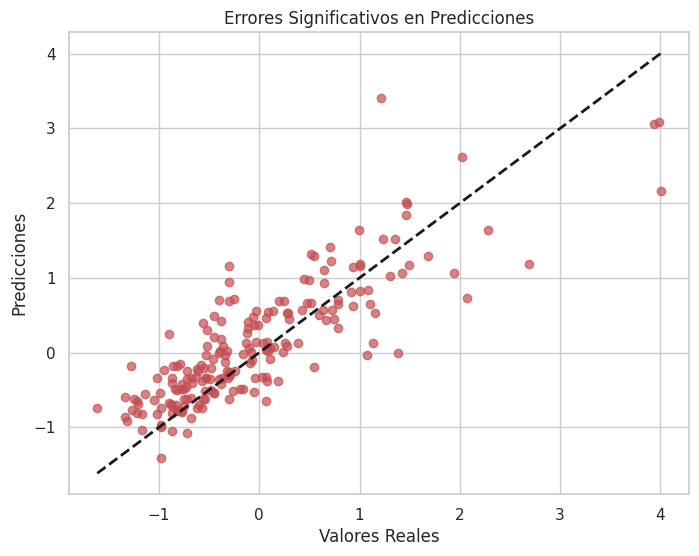

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test[significant_errors], y_test_pred[significant_errors], alpha=0.7, color='r')
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'k--', lw=2)
plt.title('Errores Significativos en Predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression

# Ajustamos un modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicciones del modelo de regresión lineal
y_lr_pred = lr.predict(X_test)

# Calculamos el RMSE y R² del modelo lineal
lr_rmse = np.sqrt(mean_squared_error(y_test, y_lr_pred))
lr_r2 = r2_score(y_test, y_lr_pred)

print(f"RMSE Regresión Lineal: {lr_rmse:.4f}")
print(f"R² Regresión Lineal: {lr_r2:.4f}")

# Calcular RMSE y R² de nuestro modelo
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)
print(f"RMSE Mi Modelo: {rmse:.4f}")
print(f"R² Mi Modelo: {r2:.4f}")

RMSE Regresión Lineal: 0.5317
R² Regresión Lineal: 0.6947
RMSE Mi Modelo: 0.5142
R² Mi Modelo: 0.7144


In [36]:
# Guardado en formato HDF5 (.h5)
final_model.save('housing_price_model_v1.h5')

In [39]:
from tensorflow.keras.models import load_model
from tensorflow.keras import metrics

# Cargar el modelo y especificar las métricas
model = load_model('housing_price_model_v1.h5', custom_objects={'mse': metrics.MeanSquaredError()})